In [1]:
# importing necessary libraries for EDA and Cleaning
import pandas as pd
# increasing column width by using pandas display option
# This way we can see all given text
pd.options.display.max_colwidth = 200
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')
# NLP
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
import emoji


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV , StratifiedKFold

# Machine Learning Models

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB



from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional,Embedding
from keras.layers import Dropout, Conv1D, MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score


In [6]:
tweets_raw = pd.read_csv(r'C:\Users\ADMIN\Desktop\Tweets.csv')

In [7]:

tweets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
# Drop dublicates if there is any
tweets = tweets_raw.drop_duplicates(subset=["tweet_id"], keep=False) 
tweets.shape

(14330, 15)

In [9]:
# Dropping unnecessary columns
tweets = tweets[['airline','text','airline_sentiment']]
tweets.head()

,airline,text,airline_sentiment
0,Virgin America,@VirginAmerica What @dhepburn said.,neutral
1,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,Virgin America,@VirginAmerica and it's a really big bad thing about it,negative


In [10]:
tweets.isna().sum()

airline              0
text                 0
airline_sentiment    0
dtype: int64

In [11]:
#Change Text to String
tweets["text"] = tweets["text"].astype(str)

#Remove neutral sentiment to focus on just the positive and negative sentiment
tweets = tweets[tweets["airline_sentiment"] != 'neutral']
tweets.index = np.arange(0, len(tweets))
tweets.shape

(11295, 3)

In [12]:
# in our case we are trying to find as possible as negative sentiment.I will assign negative sentiment as 1 , positive as 0
# replacing the categorical values of 'airline_sentiment' to numeric values as positive = 0 , negative = 1
tweets['airline_sentiment'].replace(('positive', 'negative'), (0, 1), inplace=True)
tweets['airline_sentiment'].value_counts()
     

airline_sentiment
1    8992
0    2303
Name: count, dtype: int64

In [13]:
tweets[['text']][1000:1020]

,text
1000,"@united just sent you a message on Facebook, how do I follow up a complaint re. Missing clothing out of checked baggage?"
1001,"@united why do I check in online if I still have to wait in line for an hour to ""check in"" at counter? #fuckinlame @naia_miaa"
1002,@united very poor customer service. I WILL think again befor Flight Booking Problems another United flight.
1003,@united an over booked flight to start with and a red eye from lax to bos with no reclining seat.... #lastflightwithyouever
1004,@united an efficient layout at kiosks/bag drop lines would help as there is no definition to space. Additional friendly and helpful staff
1005,"@united - 75% of a plane's passengers boarding in your ""Premier"" groups might be an indication of a broken process."
1006,@united EWR agent Barbara was FABULOUS and an example of CUST. SERV. A pleasure talking to you😊 http://t.co/KMQuLY9g5E
1007,"@united Cancelled Flightled a flight cause the crew needed sleep.But it's totally okay to wake me up at 3am just to let me know it's Cancelled Flightled, again."
1008,"@united changed my last name for my MileagePlus acct on the site in an hour. @BA_USA had me on hold for 20mins, then 5 days &amp; no change yet"
1009,"@united flight landed 13 hours ago, 2 more flights CMH-IAD last night and still no bag..could have driven it from CMH"


In [14]:
df = tweets.copy()

#Removing tagged airlines
df["text"] = df["text"].str.replace("(@+\w+)", "")

#Lowercasing text
df["text"] = df["text"].str.lower()

#Removing numbers
df["text"] = df["text"].str.replace('\d+', '', regex=True)

#Removing punctuations
def remove_punc(text):
    words_wo_punct = re.sub(r"[^A-Za-z0-9\s]+", "", text)
    return words_wo_punct

df["text"] = df["text"].apply(lambda x: remove_punc(x))

#Removing Whitespace
df["text"] = df["text"].str.strip()

#Removing emoji
df["text"] = df["text"].apply(lambda x: emoji.demojize(x))


In [15]:
df[['text']][1000:1020]


,text
1000,united just sent you a message on facebook how do i follow up a complaint re missing clothing out of checked baggage
1001,united why do i check in online if i still have to wait in line for an hour to check in at counter fuckinlame naiamiaa
1002,united very poor customer service i will think again befor flight booking problems another united flight
1003,united an over booked flight to start with and a red eye from lax to bos with no reclining seat lastflightwithyouever
1004,united an efficient layout at kiosksbag drop lines would help as there is no definition to space additional friendly and helpful staff
1005,united of a planes passengers boarding in your premier groups might be an indication of a broken process
1006,united ewr agent barbara was fabulous and an example of cust serv a pleasure talking to you httptcokmqulyge
1007,united cancelled flightled a flight cause the crew needed sleepbut its totally okay to wake me up at am just to let me know its cancelled flightled again
1008,united changed my last name for my mileageplus acct on the site in an hour bausa had me on hold for mins then days amp no change yet
1009,united flight landed hours ago more flights cmhiad last night and still no bagcould have driven it from cmh


In [16]:
# Creating variable for english stopwords.
stop_words = stopwords.words('english')

In [17]:
def cleaning(data):
    
    #Tokenize
    text_tokens = word_tokenize(data.replace("'", "")) 
    
    #Removing Stopwords
    tokens_without_sw = [t for t in text_tokens if t not in stop_words]  
    
    #lemma
    text_lemma = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    cleaned_text = " ".join(text_lemma)

    return cleaned_text


In [18]:
#Applying function to target
df["text"] = df["text"].apply(cleaning)
df["text"].head()
     

0                                      virginamerica plus youve added commercial experience tacky
1    virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse
2                                                              virginamerica really big bad thing
3          virginamerica seriously would pay flight seat didnt playing really bad thing flying va
4                                virginamerica yes nearly every time fly vx ear worm wont go away
Name: text, dtype: object

In [19]:
# Showing which words have the most counts in the all texts within each category.
FreqDist(" ".join(df["text"]).split()).most_common(50)

[('flight', 3684),
 ('united', 3408),
 ('usairways', 2634),
 ('americanair', 2210),
 ('southwestair', 1785),
 ('jetblue', 1637),
 ('get', 1122),
 ('hour', 1096),
 ('cancelled', 921),
 ('service', 910),
 ('thanks', 885),
 ('customer', 880),
 ('u', 877),
 ('time', 827),
 ('bag', 685),
 ('help', 682),
 ('plane', 646),
 ('im', 618),
 ('hold', 605),
 ('amp', 546),
 ('thank', 526),
 ('cant', 515),
 ('still', 511),
 ('call', 508),
 ('day', 500),
 ('delayed', 495),
 ('one', 489),
 ('airline', 489),
 ('gate', 481),
 ('need', 448),
 ('flightled', 438),
 ('back', 436),
 ('dont', 427),
 ('would', 419),
 ('delay', 411),
 ('phone', 406),
 ('hr', 402),
 ('got', 392),
 ('agent', 391),
 ('late', 390),
 ('seat', 389),
 ('please', 373),
 ('guy', 364),
 ('min', 349),
 ('virginamerica', 345),
 ('like', 345),
 ('today', 343),
 ('waiting', 343),
 ('minute', 325),
 ('ive', 309)]

In [20]:
# Showing which words have the most counts in the positive texts within each category.

all_positive_text = df.loc[df.airline_sentiment == 0].text.map(word_tokenize).values
all_positive_corpus = [word for text in all_positive_text for word in text]
freq =FreqDist(all_positive_corpus).most_common(50)

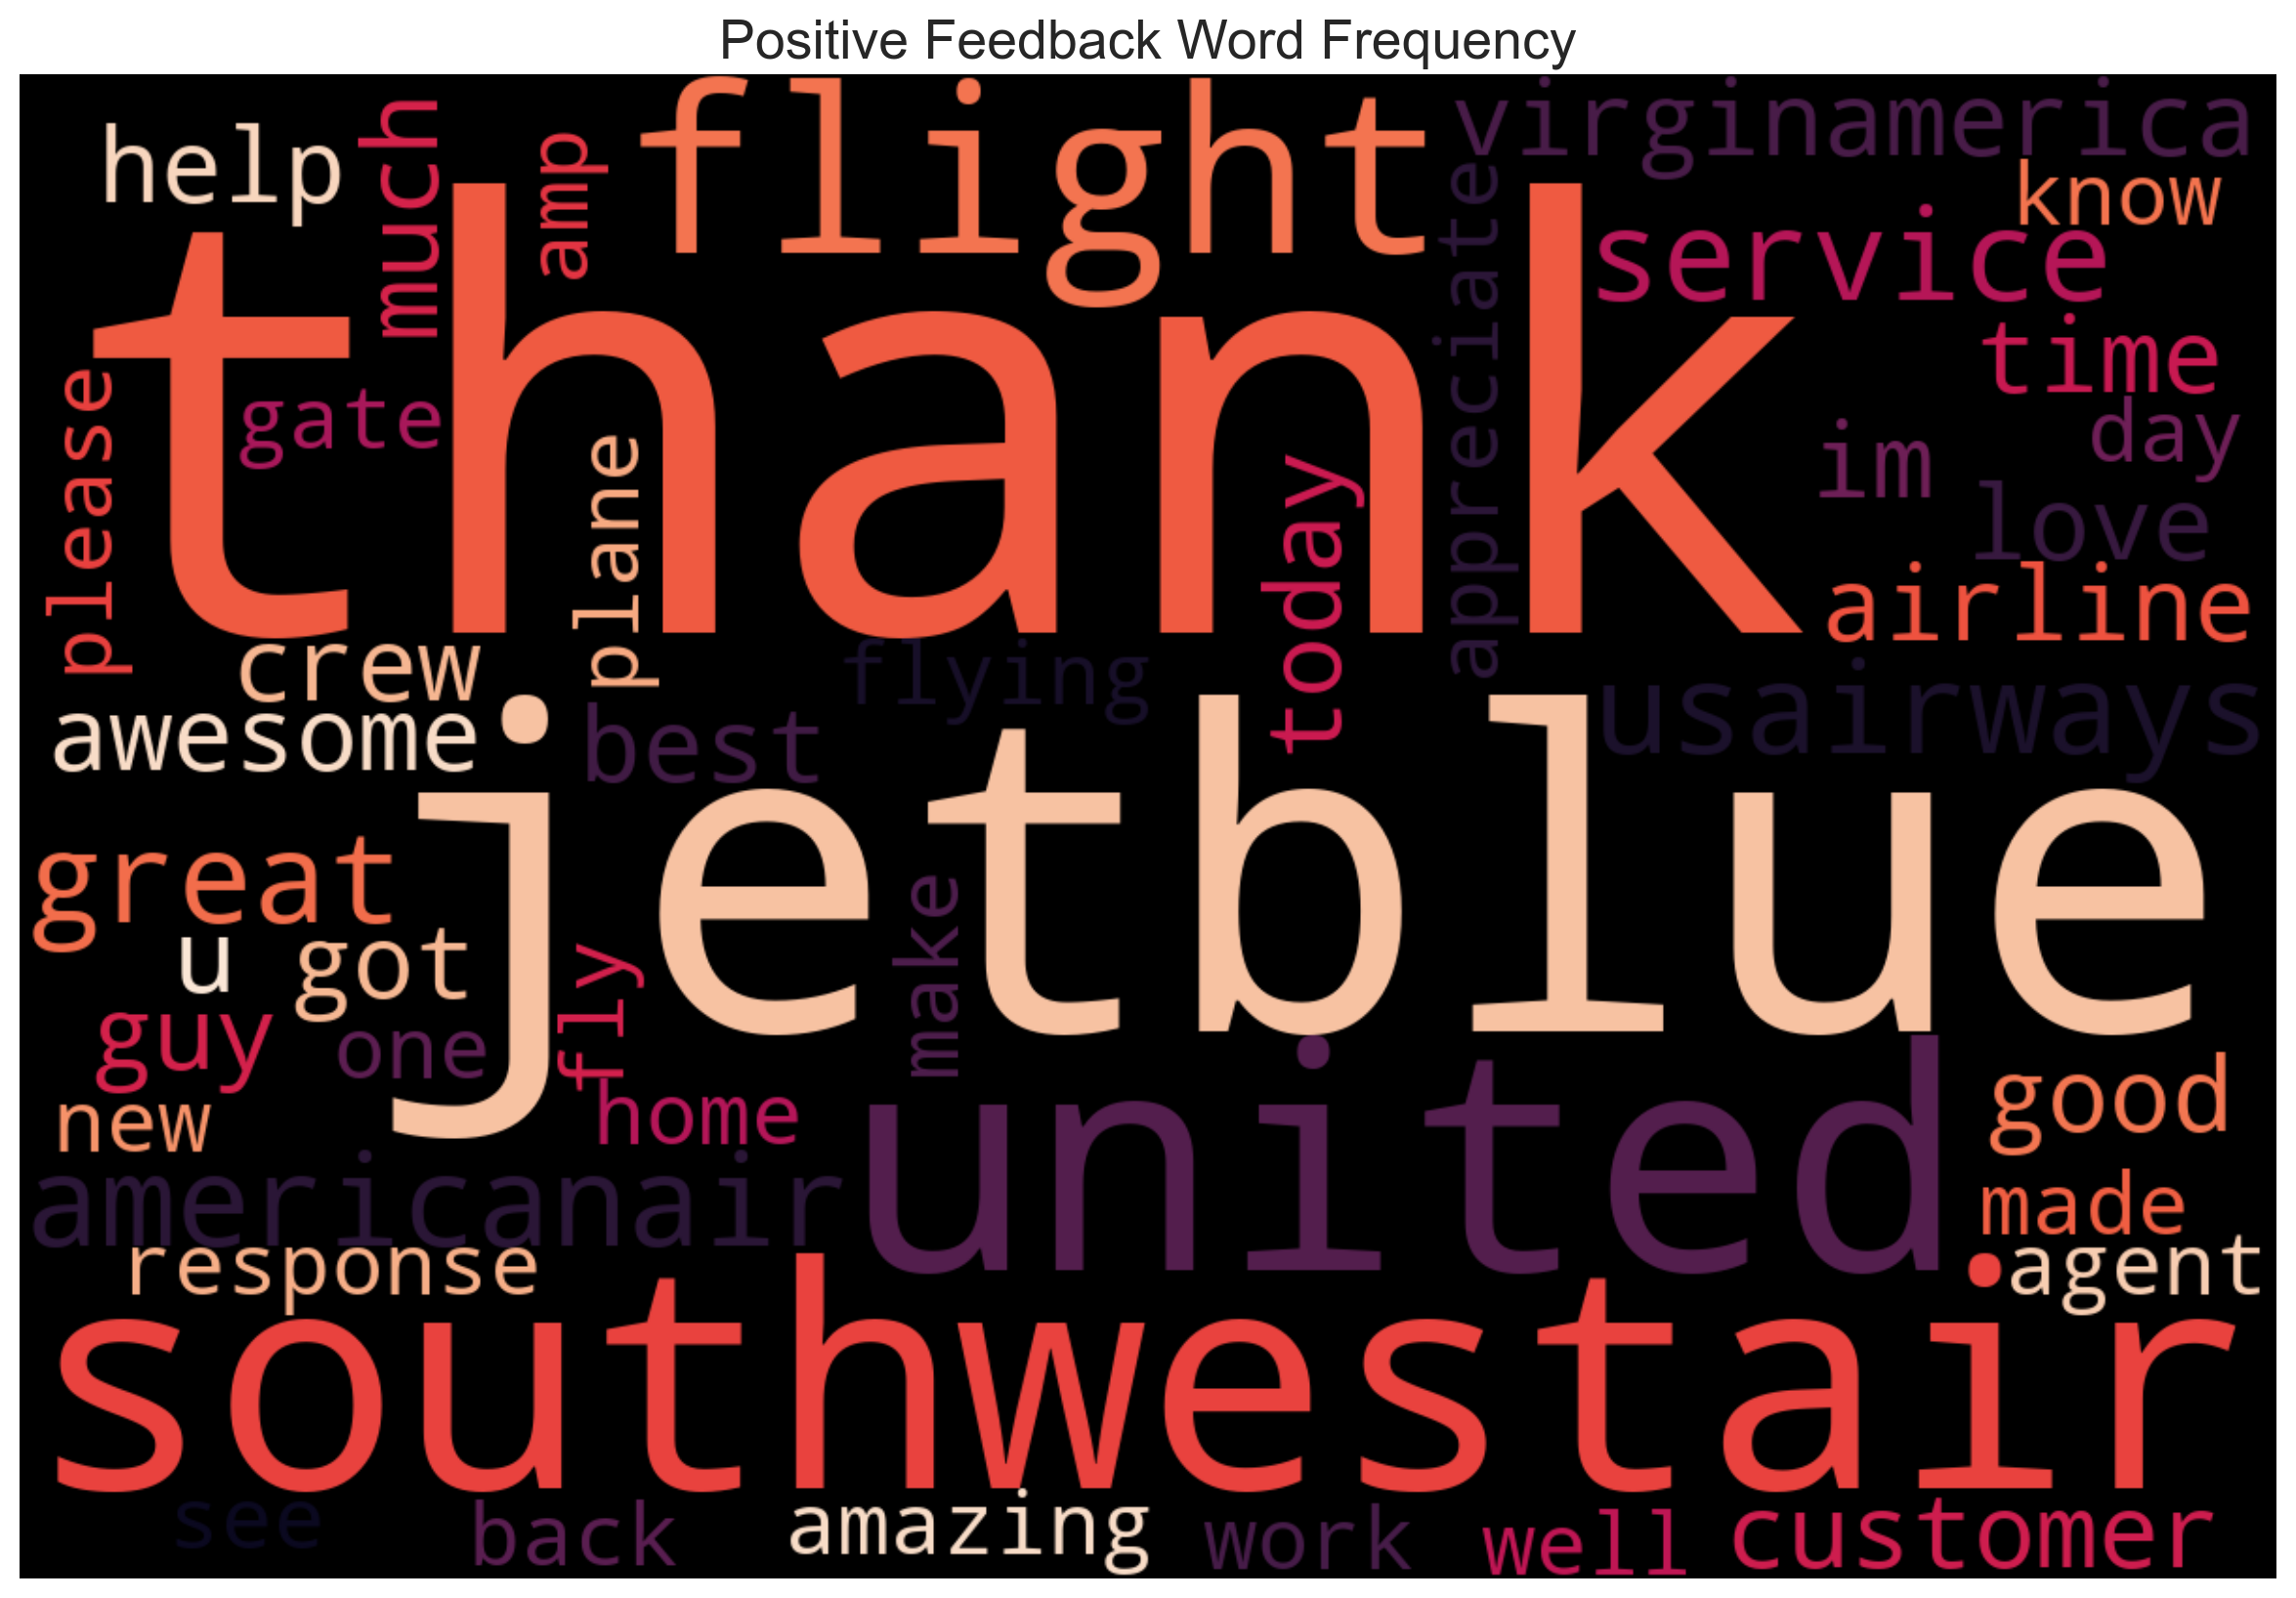

In [21]:
from wordcloud import WordCloud
all_positive_corpus = ' '.join(w[0] for w in freq)
airline_wordcloud = WordCloud(width = 1200, height = 800 , background_color='black', colormap='rocket').generate(all_positive_corpus)


plt.figure(figsize=(20,10))
plt.imshow(airline_wordcloud, interpolation='bilinear')
plt.title('Positive Feedback Word Frequency' , fontsize = 20)
plt.axis("off")
plt.show()

In [22]:
# Showing which words have the most counts in the negative texts within each category.

all_negative_text = df.loc[df.airline_sentiment == 1].text.map(word_tokenize).values
all_negative_corpus = [word for text in all_negative_text for word in text]
freq = FreqDist(all_negative_corpus).most_common(50)


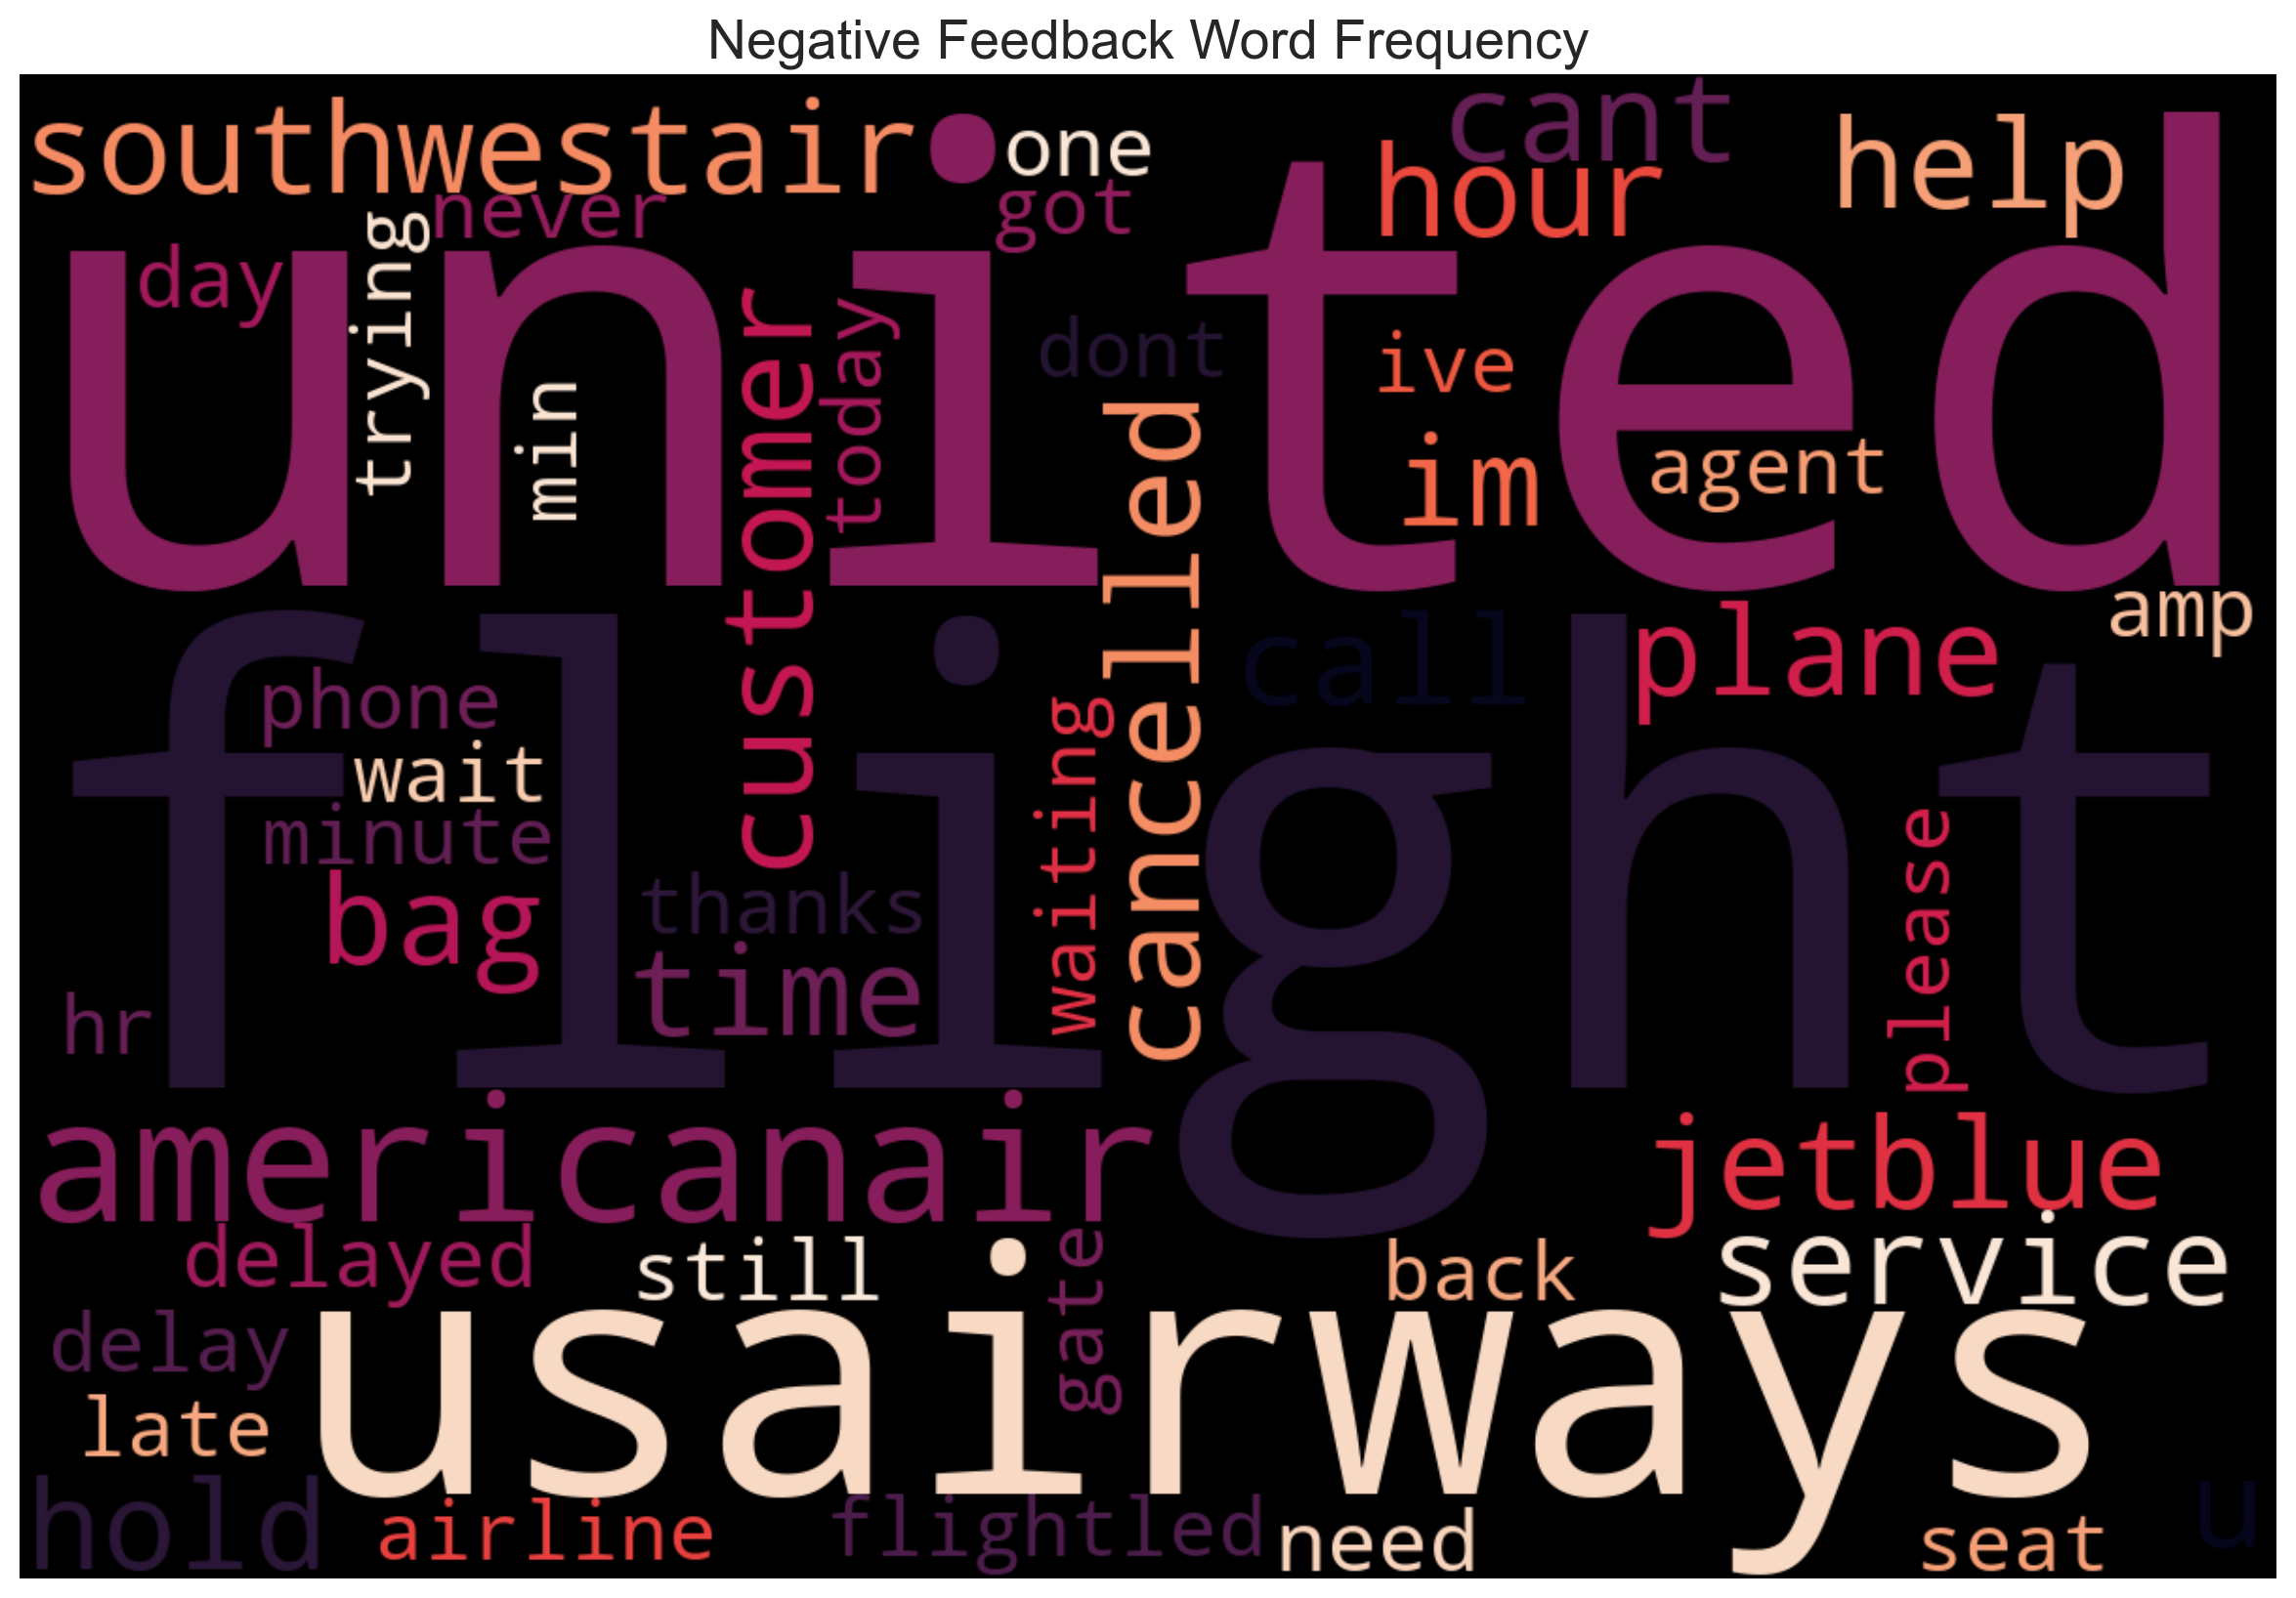

In [23]:
all_negative_corpus = ' '.join(w[0] for w in freq)
airline_wordcloud = WordCloud(width = 1200, height = 800, background_color='black', colormap='rocket').generate(all_negative_corpus)


plt.figure(figsize=(20,10))
plt.imshow(airline_wordcloud, interpolation='bilinear')
plt.title('Negative Feedback Word Frequency' , fontsize = 20)
plt.axis("off")
plt.show()

In [24]:
def evaluation(model, X_train, X_test):
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

#Visualize Confusion Matrix
    groupNames = ["True Neg", "False Pos", "False Neg", "True Pos"]
    groupCount = ["{0:0.0f}".format(value) for value in
                  cm.flatten()]
    groupPercent = ["{0:.2%}".format(value) for value in
                    cm.flatten()/np.sum(cm)]
                     
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(groupNames,groupCount,groupPercent)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, annot=labels, fmt='', cmap='rocket', annot_kws={"fontsize":15})
    plt.title("Confusion Matrix", fontsize=20)
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('Actual label', fontsize=12)

    print("Accuracy score is: %.2f" % accuracy_score( y_test, y_pred))
    print("The F1 score is: %.2f" % f1_score( y_test, y_pred , average='weighted'))
    print('')
    print("The recall score is: %.2f" % recall_score( y_test, y_pred))
    print("The precision score is: %.2f" % precision_score( y_test, y_pred),"\n")

    training_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print('')
    print("Accuracy on training data: %0.2f" % (training_accuracy))
    print("Accuracy on test data:     %0.2f" % (test_accuracy))

In [26]:
X = df['text']
y = df['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(9036,)
(2259,)


In [27]:
cv = CountVectorizer(min_df=5, max_df=0.70)
train_cv = cv.fit_transform(X_train)
test_cv = cv.transform(X_test)

print(train_cv.shape , y_train.shape)
print(test_cv.shape , y_test.shape)


(9036, 1944) (9036,)
(2259, 1944) (2259,)


Accuracy score is: 0.91
The F1 score is: 0.91

The recall score is: 0.93
The precision score is: 0.95 


Accuracy on training data: 0.93
Accuracy on test data:     0.91


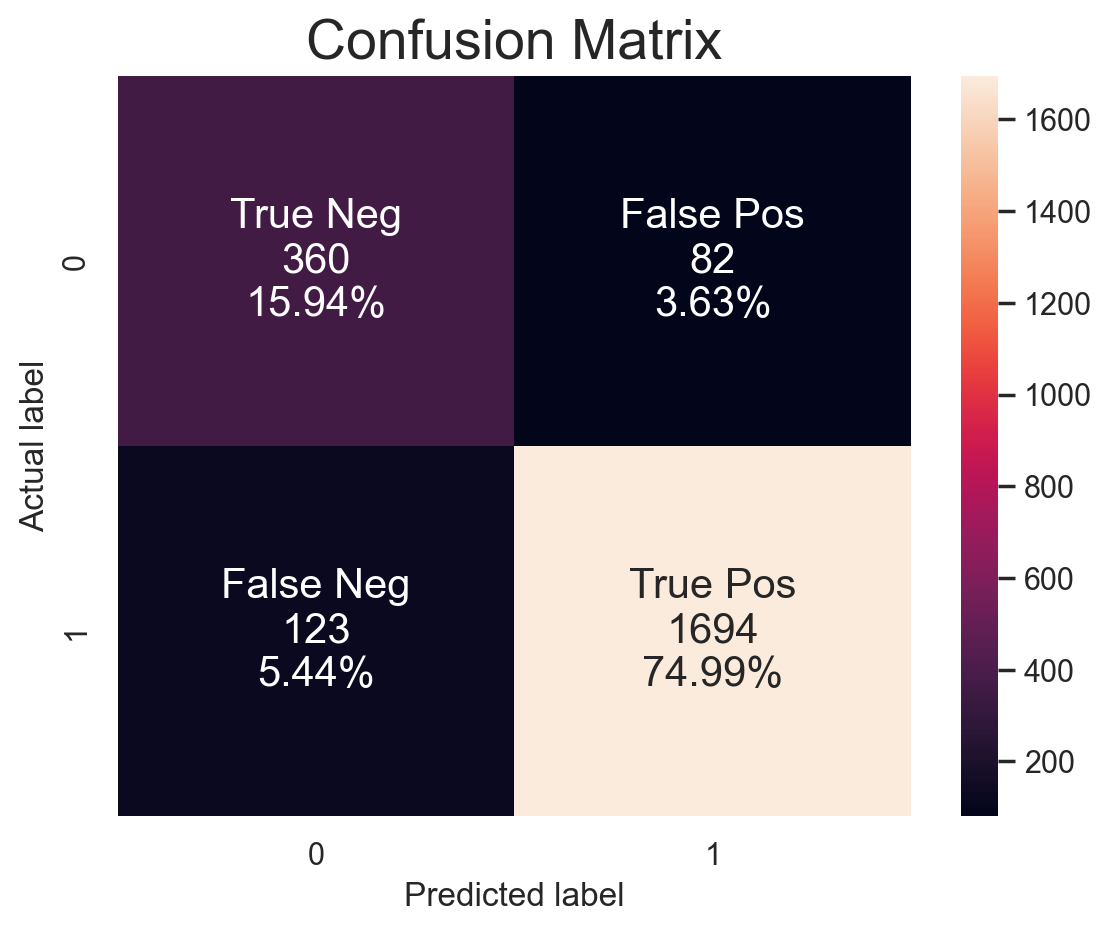

In [28]:
bnb_cv= BernoulliNB().fit(train_cv, y_train)
evaluation(bnb_cv ,train_cv, test_cv)

In [29]:
y_pred = bnb_cv.predict(test_cv)
bnb_cv_acc = accuracy_score( y_test, y_pred)
bnb_cv_f1_score = f1_score(y_test, y_pred, average='weighted')

In [30]:

X = df['text']
y = df['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
     

(9036,)
(2259,)


In [31]:
tfidf = TfidfVectorizer(min_df=5, max_df=0.70)
train_tfidf = tfidf.fit_transform(X_train)
test_tfidf = tfidf.transform(X_test)


print(train_tfidf.shape , y_train.shape)
print(test_tfidf.shape , y_test.shape)

(9036, 1944) (9036,)
(2259, 1944) (2259,)


Accuracy score is: 0.91
The F1 score is: 0.91

The recall score is: 0.93
The precision score is: 0.95 


Accuracy on training data: 0.93
Accuracy on test data:     0.91


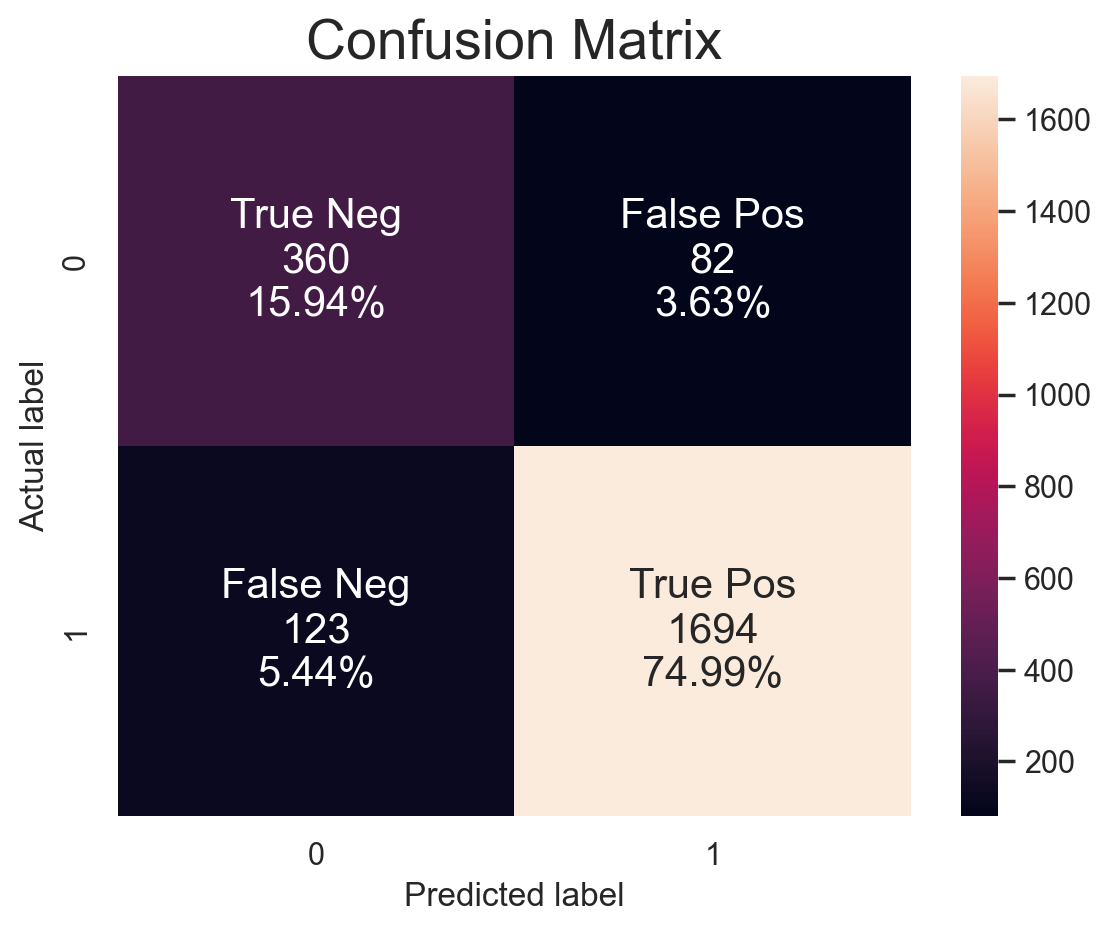

In [32]:
bnb_tfidf = BernoulliNB().fit(train_tfidf, y_train)
evaluation(bnb_tfidf ,train_tfidf, test_tfidf)

In [33]:
y_pred = bnb_tfidf.predict(test_tfidf)
bnb_tfidf_acc = accuracy_score( y_test, y_pred)
bnb_tfidf_f1_score = f1_score(y_test, y_pred, average='weighted')